## Initialize RGCPD class
args:
- list_of_name_path
- start_end_TVdate

        list_of_name_path : list of name, path tuples. 
        Convention: first entry should be (name, path) of target variable (TV).
        list_of_name_path = [('TVname', 'TVpath'), ('prec_name1', 'prec_path1')]
        
        TV period : tuple of start- and enddate in format ('mm-dd', 'mm-dd')

In [2]:
%load_ext autoreload
%autoreload 2
from RGCPD import RGCPD
rg = RGCPD()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
initializing with test data


Post-process input data 
args:
- loadleap=False
- seldates=None 
- selbox=None,
- format_lon='east_west',
- detrend=True
- anomaly=True

In [3]:
rg.pp_precursors()

Loaded post-processed data of sst_test



### Post-processing Target Variable

In [4]:
rg.pp_TV()

original tfreq of imported response variable is converted to desired tfreq
Detrending Respone Variable.
Performing 3 day rolling mean with gaussian window (std=1.5) to get better interannual statistics
using absolute anomalies w.r.t. climatology of smoothed concurrent day accross years


In [5]:
rg.traintest()

No train test split


In [6]:
rg.calc_corr_maps() 


sst - calculating correlation maps
Progress traintest set 100.0%, trainsize=(320dp, 100%)



In [7]:
rg.cluster_regions()

Plotting Corr maps sst_test_labels_init, split 0, lag 10



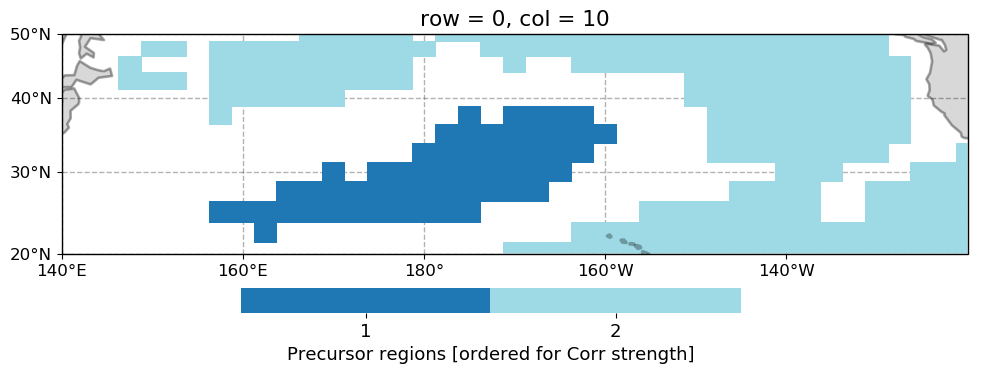

In [8]:
rg.quick_view_labels() 

In [9]:
rg.get_ts_prec()

sst_test
There are [2] regions (list of different splits)


In [10]:
rg.PCMCI_df_data()

Could not import rpy package
Could not import r-package RCIT
Progress causal inference - traintest set 100.0%


                  lag_corr  region_number       var  causal  lag_tig
0 t2m_eUS                0              0   t2m_eUS    True     -1.0
  1..1..sst_test         1              1  sst_test    True      0.0
  1..2..sst_test         1              2  sst_test    True      0.0



Plotting all fields significant at alpha_level_tig, while conditioning on parents that were found in the PC step
Plotting Corr maps sst_test_labels, split 0, lag sst_test_labels_tigr



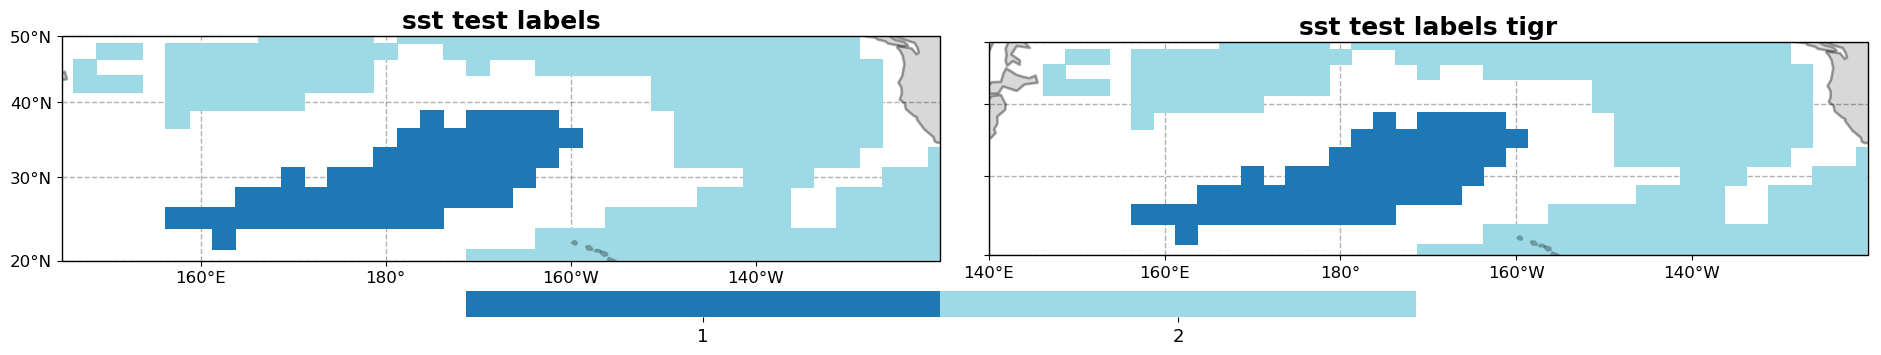

Plotting Corr maps sst_test_labels, split 0, lag robustness sst_test causal



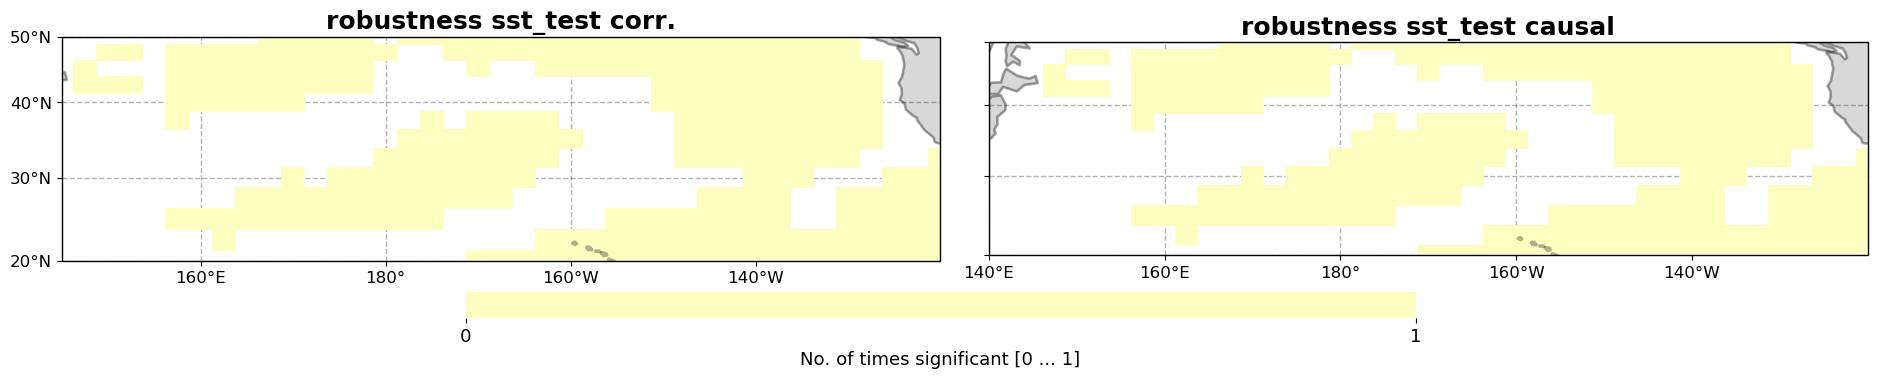


Plotting all fields significant at alpha_level_tig, while conditioning on parents that were found in the PC step
Plotting Corr maps sst_corr_and_tigr, split 0, lag sst_test_corr_tigr



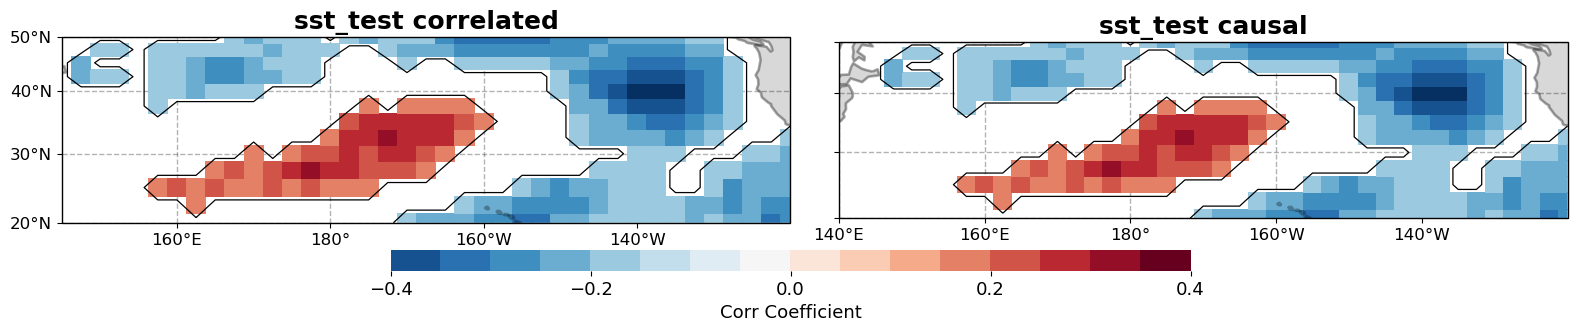

In [11]:
rg.plot_maps_sum()

In [12]:
rg.df_data

t2m_eUS  1..1..sst_test  1..2..sst_test  TrainIsTrue  RV_mask
0 1979-01-11  2.450949        0.155905        0.172561         True    False
  1979-01-21  5.202951        0.556707       -0.094193         True    False
  1979-01-31  1.976927        0.269605       -0.090640         True    False
  1979-02-10  0.300682        0.533181       -0.204430         True    False
  1979-02-20  3.358494        1.020512       -0.207898         True    False
...                ...             ...             ...          ...      ...
  2018-11-17  1.427837       -0.441909        0.784427         True    False
  2018-11-27  4.672652       -0.261957        0.737966         True    False
  2018-12-07  1.403350       -0.341637        0.577418         True    False
  2018-12-17  6.580028       -0.198795        0.412008         True    False
  2018-12-27  6.242537       -0.124083        0.296003         True    False

[1440 rows x 5 columns]